In [144]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [145]:
df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")

In [146]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [147]:
df.shape

(181673, 14)

In [148]:
missing_values_count=df.isnull().sum()
print(missing_values_count)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [150]:
df['item _date'] = pd.to_datetime (df ['item_date'], format= '%Y%m%d', errors='coerce'). dt .date
df ['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df[ 'customer'], errors='coerce')
df [' country'] = pd.to_numeric(df[ 'country'], errors='coerce')
df['application'] = pd. to_numeric(df ['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df[ 'thickness'], errors= 'coerce')
df['width'] = pd.to_numeric(df[ 'width'], errors='coerce')
df ['material_ref'] = df['material_ref'].str.lstrip('e')
df ['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format= '%Y%m%d', errors= 'coerce').dt.date
df ['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [151]:
df['material_ref'].fillna('unknown',inplace=True)
df=df.dropna()
missing_values_count =df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
item _date       0
 country         0
dtype: int64
(181631, 16)


In [152]:
df_p=df.copy()

In [153]:
df_p['quantity tons']
df_p['country']
df_p['application']
df_p['thickness']
df_p['width']
df_p['selling_price']

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
181668     591.00
181669     589.00
181670     619.00
181671     601.00
181672     607.00
Name: selling_price, Length: 181631, dtype: float64

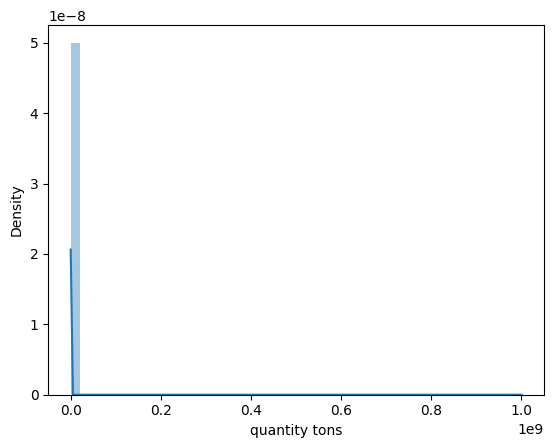

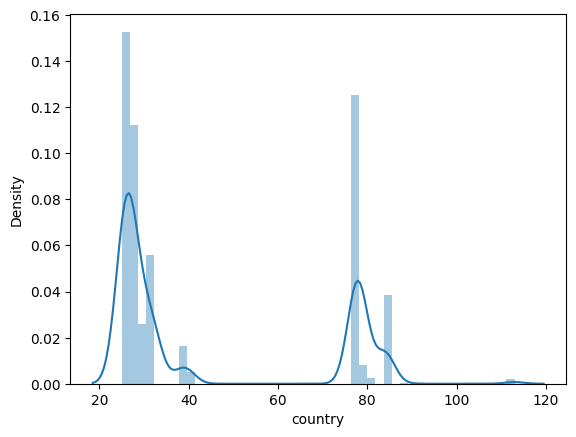

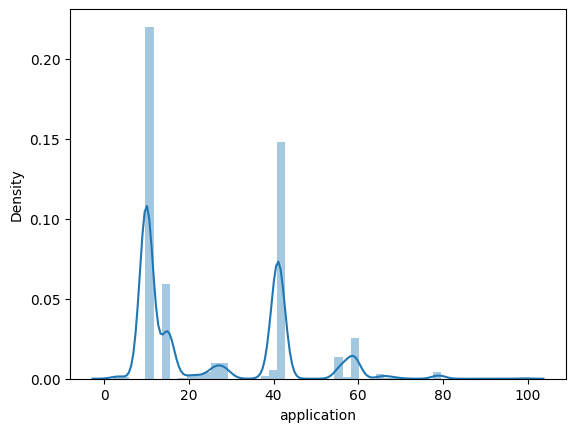

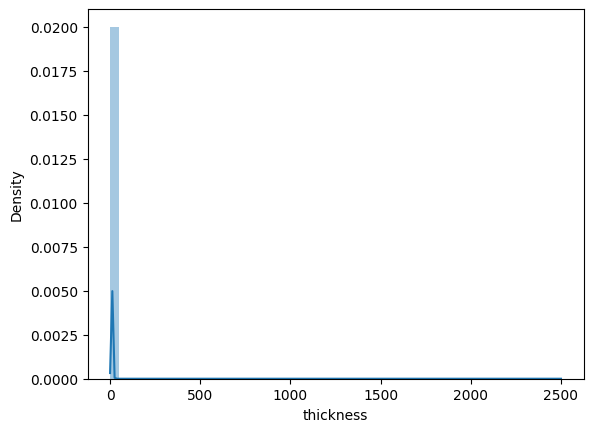

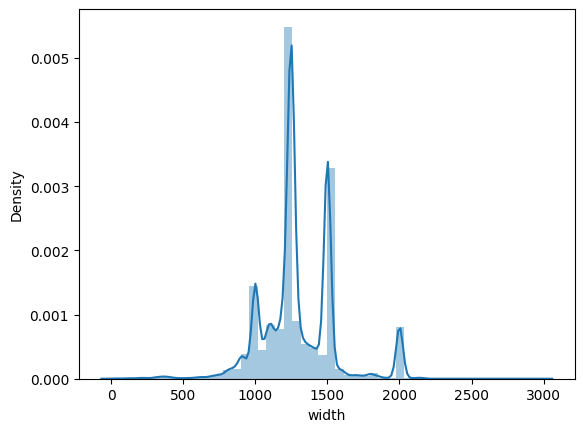

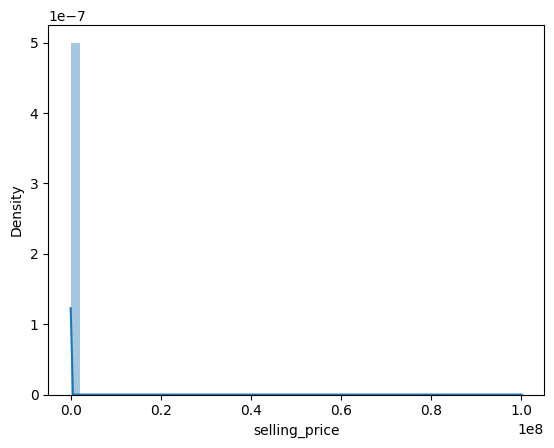

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot (df_p[ 'quantity tons'])
plt.show()
sns.distplot(df_p['country'])
plt.show()
sns.distplot (df_p['application'])
plt.show()
sns.distplot(df_p['thickness'])
plt.show()
sns.distplot(df_p[ 'width'])
plt.show()
sns.distplot(df_p['selling_price'])
plt.show()

In [155]:
import numpy as np
mask1 = df_p['selling_price'] <= 0
print (mask1.sum())
df_p.loc[mask1, 'selling_price'] = np.nan
mask1 = df_p['quantity tons'] <= 0
print (mask1.sum())
df_p.loc [mask1, 'quantity tons'] = np.nan
mask1 = df_p[ 'thickness'] <= 0
print (mask1.sum())

7
4
0


In [156]:
df_p.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
item _date       0
 country         0
dtype: int64

In [157]:
df_p.dropna(inplace=True)
len(df_p)

181620

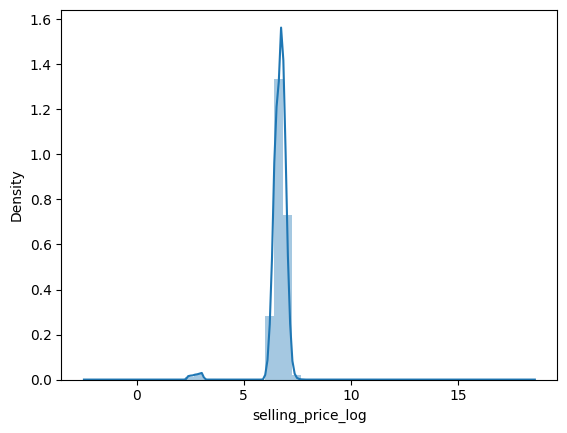

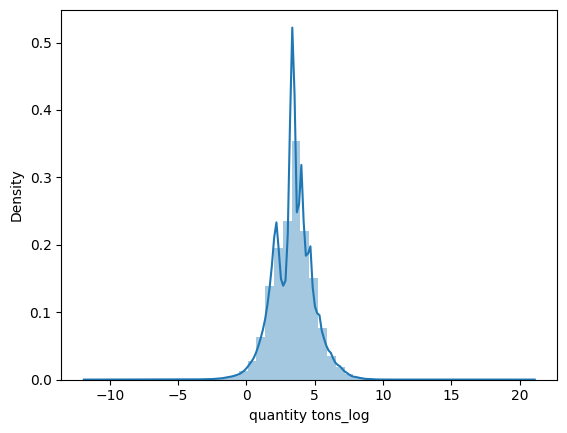

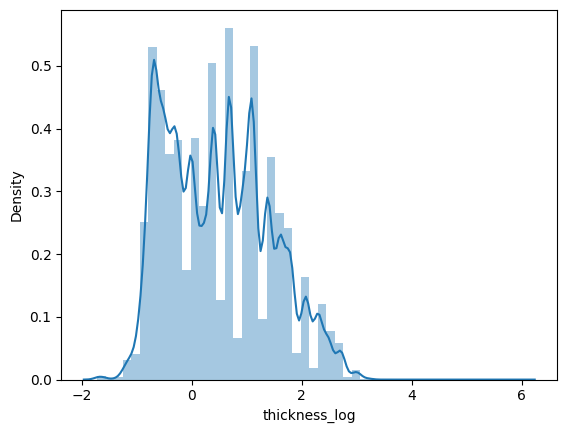

In [158]:
import numpy as np
df_p['selling_price_log'] = np.log(df_p['selling_price'])
sns.distplot (df_p['selling_price_log'])
plt. show()
df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
sns.distplot (df_p[ 'quantity tons_log' ])
plt. show()
df_p['thickness_log'] = np.log(df_p['thickness'])
sns.distplot(df_p['thickness_log'])
plt.show()

In [159]:
df_p.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item _date,country,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,2021-04-01,28.0,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,2021-04-01,25.0,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,2021-04-01,30.0,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,2021-04-01,32.0,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,2021-04-01,28.0,6.357842,6.666354,1.386294


In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn. tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
X=df_p[['quantity tons_log', 'status', 'item type', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']]
y=df_p['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder (handle_unknown= 'ignore')
ohe.fit (X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown= 'ignore')
ohe2.fit (X[['status']])
X_be = ohe2.fit_transform(X[['status']]) . toarray ()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']].values,X_ohe,X_be),axis=1)
scaler = StandardScaler ()
X = scaler. fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 5, 10, 20],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2],
               'max_features': ['auto','sqrt', 'log2']}
# gridsearchev
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train,y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict (X_test)
# evalution metrics
mse = mean_squared_error (y_test, y_pred)
r2 = r2_score (y_test, y_pred)
print('Mean squared error:',mse)
print ('R-squared:',r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean squared error: 0.023596699236637722
R-squared: 0.9267572247793594


In [161]:
new_sample = np.array([[np. log(40), 10, np. log (250), 0, 28, 30202938, 1670798778, 'PL', 'Won ']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]) .toarray ()
new_sample_be = ohe2.transform(new_sample[:, [8]]). toarray()
new_sample = np. concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler. transform(new_sample)
new_pred = best_model.predict (new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [735.12087751]


In [162]:
import pickle
with open('cop_model.pk1', 'wb') as file:
   pickle.dump(best_model, file)
with open('cop_scaler.pk','wb') as f:
  pickle.dump(scaler, f)
with open('cop_t.pki', 'wb') as f:
  pickle.dump (ohe, f)
with open('cop_s.pk1', 'wb') as f:
  pickle.dump (ohe2, f)

In [163]:
print(len(df_p))
df_p.head()

181620


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item _date,country,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,2021-04-01,28.0,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,2021-04-01,25.0,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,2021-04-01,30.0,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,2021-04-01,32.0,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,2021-04-01,28.0,6.357842,6.666354,1.386294


In [169]:
df_c=df_p[df_p['status'].isin(['won','Lost'])]
len(df_c)

34431

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
import pandas as pd

# Assuming df_c is your DataFrame
Y = df_c['status']
X = df_c[['quantity tons_log', 'selling_price_log', 'item type', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']]

# Encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
y = be.fit_transform(Y)

# Independent features after encoding
x_categorical = np.concatenate((X_ohe, X[['quantity tons_log', 'selling_price_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']]), axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_categorical)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 1.0
Confusion Matrix:
[[6887]]


Confusion Matrix:
[[6887]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6887

    accuracy                           1.00      6887
   macro avg       1.00      1.00      1.00      6887
weighted avg       1.00      1.00      1.00      6887



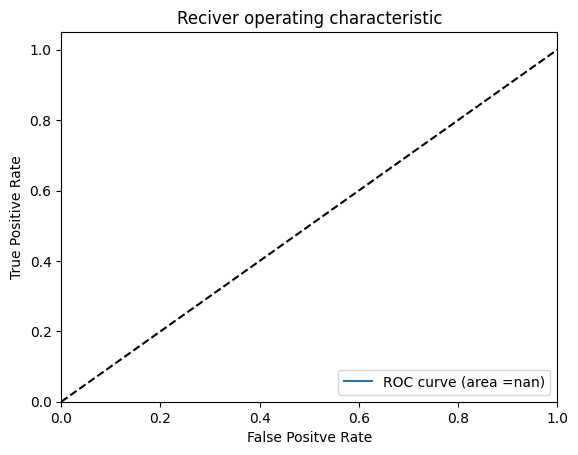

In [175]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print (confusion_matrix(y_test, y_pred))
print ("Classification Report: ")
print (classification_report (y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='ROC curve (area =%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [176]:
new_sample=np.array([[np.log(700),np.log(956),10,np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe=ohe.transform(new_sample[:,[8]]).toarray()
new_sample=np.concatenate((new_sample[:,[0,1,2,3,4,5,6,7]],new_sample_ohe),axis=1)
new_sample=scaler.transform(new_sample)
new_pred=dtc.predict(new_sample)
if new_pred==1:
    print('The status is:Won')
else:
    print('The status is :Lost')

The status is :Lost
